In [7]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# ---------------------------------------
# Load dataset
# ---------------------------------------
data = fetch_california_housing()

In [9]:
# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
# Add target column (house price)
df["MedHouseVal"] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [11]:
# ---------------------------------------
# Summary
# ---------------------------------------
print("Shape (rows, columns):", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\nDescriptive Statistics:")
print(df.describe().T)

print("\nRange of Each Column (min, max):")
for col in df.columns:
    print(f"{col:15s}  min={df[col].min():.2f}   max={df[col].max():.2f}")

Shape (rows, columns): (20640, 9)

Data Types:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Descriptive Statistics:
               count         mean          std         min         25%  \
MedInc       20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge     20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms     20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms    20640.0     1.096675     0.473911    0.333333    1.006079   
Population   20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup     20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude     20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude    20640.0  -119.569704     2.003532 -124.350000 -121.800000   
MedHouseVal  20640.0     2.068558     1.1

In [13]:
import numpy as np

cov_matrix = df.cov()  
print("Covariance Matrix:")
print(cov_matrix)

# Extract covariance of each feature without "MedHouseVal"
target_cov = cov_matrix["MedHouseVal"].drop("MedHouseVal")
target_cov_sorted = target_cov.sort_values(ascending=False)
print("\nCovariance of each feature with house price (sorted):")
print(target_cov_sorted)

Covariance Matrix:
                MedInc     HouseAge    AveRooms  AveBedrms    Population  \
MedInc        3.609323    -2.846140    1.536568  -0.055858  1.040098e+01   
HouseAge     -2.846140   158.396260   -4.772882  -0.463718 -4.222271e+03   
AveRooms      1.536568    -4.772882    6.121533   0.993868 -2.023337e+02   
AveBedrms    -0.055858    -0.463718    0.993868   0.224592 -3.552723e+01   
Population   10.400979 -4222.270582 -202.333712 -35.527225  1.282470e+06   
AveOccup      0.370289     1.724298   -0.124689  -0.030424  8.217120e+02   
Latitude     -0.323860     0.300346    0.562235   0.070575 -2.631378e+02   
Longitude    -0.057765    -2.728244   -0.136518   0.012670  2.263778e+02   
MedHouseVal   1.508475     1.533988    0.433826  -0.025539 -3.221249e+01   

               AveOccup    Latitude   Longitude  MedHouseVal  
MedInc         0.370289   -0.323860   -0.057765     1.508475  
HouseAge       1.724298    0.300346   -2.728244     1.533988  
AveRooms      -0.124689    0.56

Correlation Matrix:
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedr

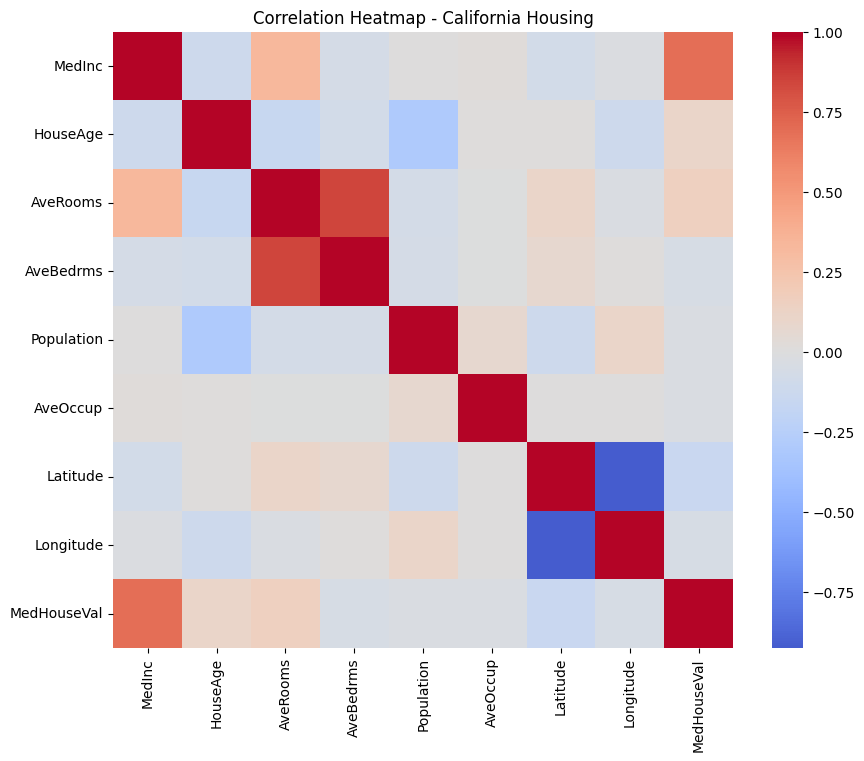


Correlation of each feature with house price (sorted):
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: MedHouseVal, dtype: float64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

print("Correlation Matrix:")
print(corr_matrix)

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap - California Housing")
plt.show()

# Extract correlations 
target_corr = corr_matrix["MedHouseVal"].drop("MedHouseVal")
target_corr_sorted = target_corr.sort_values(ascending=False)
print("\nCorrelation of each feature with house price (sorted):")
print(target_corr_sorted)


In [ ]:
cov_matrix = df.cov()
corr_matrix = df.corr()

In [11]:
print(cov_matrix)
print("\n shape of cov_matrix:", cov_matrix.shape)

                MedInc     HouseAge    AveRooms  AveBedrms    Population  \
MedInc        3.609323    -2.846140    1.536568  -0.055858  1.040098e+01   
HouseAge     -2.846140   158.396260   -4.772882  -0.463718 -4.222271e+03   
AveRooms      1.536568    -4.772882    6.121533   0.993868 -2.023337e+02   
AveBedrms    -0.055858    -0.463718    0.993868   0.224592 -3.552723e+01   
Population   10.400979 -4222.270582 -202.333712 -35.527225  1.282470e+06   
AveOccup      0.370289     1.724298   -0.124689  -0.030424  8.217120e+02   
Latitude     -0.323860     0.300346    0.562235   0.070575 -2.631378e+02   
Longitude    -0.057765    -2.728244   -0.136518   0.012670  2.263778e+02   
MedHouseVal   1.508475     1.533988    0.433826  -0.025539 -3.221249e+01   

               AveOccup    Latitude   Longitude  MedHouseVal  
MedInc         0.370289   -0.323860   -0.057765     1.508475  
HouseAge       1.724298    0.300346   -2.728244     1.533988  
AveRooms      -0.124689    0.562235   -0.136518   

In [12]:
print(corr_matrix)
print("\nshape of corr_matrix:",corr_matrix.shape)

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

In [13]:
print(type(cov_matrix), type(corr_matrix))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [16]:
def matrix_to_pairs(mat: pd.DataFrame, col_name: str) -> pd.DataFrame:
  
    pairs = []
    cols = mat.columns
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            pairs.append((cols[i], cols[j], mat.iloc[i, j]))
    return pd.DataFrame(pairs, columns=["feat1", "feat2", col_name])

In [19]:
cov_pairs = matrix_to_pairs(cov_matrix, "cov")
cov_pairs

,feat1,feat2,cov
0,MedInc,HouseAge,-2.846140
1,MedInc,AveRooms,1.536568
2,MedInc,AveBedrms,-0.055858
3,MedInc,Population,10.400979
4,MedInc,AveOccup,0.370289
5,MedInc,Latitude,-0.323860
6,MedInc,Longitude,-0.057765
7,MedInc,MedHouseVal,1.508475
8,HouseAge,AveRooms,-4.772882
9,HouseAge,AveBedrms,-0.463718


In [20]:
corr_pairs = matrix_to_pairs(corr_matrix, "corr")
corr_pairs

,feat1,feat2,corr
0,MedInc,HouseAge,-0.119034
1,MedInc,AveRooms,0.326895
2,MedInc,AveBedrms,-0.062040
3,MedInc,Population,0.004834
4,MedInc,AveOccup,0.018766
5,MedInc,Latitude,-0.079809
6,MedInc,Longitude,-0.015176
7,MedInc,MedHouseVal,0.688075
8,HouseAge,AveRooms,-0.153277
9,HouseAge,AveBedrms,-0.077747


In [22]:
pairs = cov_pairs.merge(corr_pairs, on=["feat1", "feat2"])
pairs

,feat1,feat2,cov,corr
0,MedInc,HouseAge,-2.846140,-0.119034
1,MedInc,AveRooms,1.536568,0.326895
2,MedInc,AveBedrms,-0.055858,-0.062040
3,MedInc,Population,10.400979,0.004834
4,MedInc,AveOccup,0.370289,0.018766
5,MedInc,Latitude,-0.323860,-0.079809
6,MedInc,Longitude,-0.057765,-0.015176
7,MedInc,MedHouseVal,1.508475,0.688075
8,HouseAge,AveRooms,-4.772882,-0.153277
9,HouseAge,AveBedrms,-0.463718,-0.077747


In [33]:
pairs["abs_cov"] = pairs["cov"].abs()

cov_threshold_high = pairs["abs_cov"].quantile(0.80)

large_cov_small_corr = (
    pairs[
        (pairs["abs_cov"] >= cov_threshold_high) &
        (pairs["abs_corr"] < 0.4)
    ]
    .sort_values("abs_cov", ascending=False)
)


print("\n=== SUMMARY (LARGE COV, SMALL CORR) ===")
print(
    large_cov_small_corr[["feat1", "feat2", "cov", "corr"]]
    .head(5)
    .to_string(index=False)
)



=== SUMMARY (LARGE COV, SMALL CORR) ===
     feat1      feat2          cov      corr
  HouseAge Population -4222.270582 -0.296244
Population   AveOccup   821.712002  0.069863
Population   Latitude  -263.137814 -0.108785
Population  Longitude   226.377839  0.099773
  AveRooms Population  -202.333712 -0.072213


In [36]:
###### full code
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing


data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MedHouseVal"] = data.target

cov_matrix = df.cov()
corr_matrix = df.corr()

def matrix_to_pairs(mat: pd.DataFrame, col_name: str) -> pd.DataFrame:
  
    pairs = []
    cols = mat.columns
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            pairs.append((cols[i], cols[j], mat.iloc[i, j]))
    return pd.DataFrame(pairs, columns=["feat1", "feat2", col_name])



cov_pairs = matrix_to_pairs(cov_matrix, "cov")
corr_pairs = matrix_to_pairs(corr_matrix, "corr")


pairs = cov_pairs.merge(corr_pairs, on=["feat1", "feat2"])

pairs["abs_cov"] = pairs["cov"].abs()
pairs["abs_corr"] = pairs["corr"].abs()


cov_threshold_high = pairs["abs_cov"].quantile(0.80)

large_cov_small_corr = (
    pairs[
        (pairs["abs_cov"] >= cov_threshold_high) &
        (pairs["abs_corr"] < 0.4)
    ]
    .sort_values("abs_cov", ascending=False)
)


print("\n=== SUMMARY (LARGE COV, SMALL CORR) ===")
print(
    large_cov_small_corr[["feat1", "feat2", "cov", "corr"]]
    .head(5)
    .to_string(index=False)
)



=== SUMMARY (LARGE COV, SMALL CORR) ===
     feat1      feat2          cov      corr
  HouseAge Population -4222.270582 -0.296244
Population   AveOccup   821.712002  0.069863
Population   Latitude  -263.137814 -0.108785
Population  Longitude   226.377839  0.099773
  AveRooms Population  -202.333712 -0.072213


# 2 Breast Cancer

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# ---------------------------------------------------------
# Load dataset
# ---------------------------------------------------------
data = load_breast_cancer()

# Features and target 
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Attach target to DataFrame (optional)
df = pd.concat([X, y], axis=1)

# Show shape
print("Shape of X:", X.shape)
print("Shape of final DataFrame:", df.shape)

# Show first rows
df.head()


Shape of X: (569, 30)
Shape of full DataFrame: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------
# Load dataset
# ---------------------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# ---------------------------------------------
# Standardize data 
# ---------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier indexing
X_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)
X_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [6]:
# ---------------------------------------------
# Pick 3 benign (target=1) and 3 malignant (target=0)
# ---------------------------------------------
benign_idx = y[y == 1].index[:3]
malignant_idx = y[y == 0].index[:3]

selected_idx = list(benign_idx) + list(malignant_idx)

selected_samples = X_scaled.loc[selected_idx]
selected_labels = y.loc[selected_idx].reset_index(drop=True)

print("Selected indices:", selected_idx)
selected_samples

Selected indices: [19, 20, 21, 0, 1, 2]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
19,-0.166799,-1.147162,-0.185728,-0.251957,0.101747,-0.436850,-0.278210,-0.028609,0.267911,-0.728310,...,-0.240048,-1.045005,-0.225217,-0.297761,0.509873,-0.489605,-0.159223,0.216123,0.123347,-0.629292
20,-0.297446,-0.833008,-0.261106,-0.383638,0.792763,0.429422,-0.541362,-0.459627,0.567289,0.753087,...,-0.366368,-0.844707,-0.332744,-0.439624,-0.051226,0.148443,-0.399099,-0.636110,0.458227,-0.117250
21,-1.313080,-1.593959,-1.302806,-1.083572,0.429819,-0.747086,-0.743748,-0.726337,0.012345,0.886341,...,-1.250611,-1.631243,-1.254913,-0.994422,0.001377,-0.887193,-0.880434,-0.796903,-0.729224,-0.344455
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391


In [11]:
# ---------------------------------------------
# Pick 3 benign (target=1) and 3 malignant (target=0) randomly
# ---------------------------------------------
benign_idx = y[y == 1].sample(3, random_state=42).index
malignant_idx = y[y == 0].sample(3, random_state=42).index

selected_idx = list(benign_idx) + list(malignant_idx)

selected_samples = X_scaled.loc[selected_idx]
selected_labels = y.loc[selected_idx].reset_index(drop=True)

print("Selected indices:", selected_idx)
selected_samples


Selected indices: [395, 110, 481, 33, 400, 274]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
395,-0.019112,-0.490929,-0.091402,-0.130229,-1.132262,-0.961427,-0.778274,-0.423257,-0.622919,-0.731145,...,-0.279394,-0.054915,-0.322915,-0.344697,-1.129589,-0.834393,-0.899960,-0.540487,-0.611126,-0.989495
110,-1.235545,-0.535144,-1.213835,-1.037213,0.522334,-0.384734,-0.570740,-0.803203,-0.831023,1.113158,...,-1.080803,-0.685120,-1.059816,-0.902834,0.628230,-0.494694,-0.682153,-0.932876,-0.594948,0.040685
481,-0.064554,-0.011554,-0.133416,-0.147862,-1.170692,-0.968060,-0.738851,-0.727884,-0.849277,-0.972138,...,0.029159,0.120957,-0.085224,-0.088042,-1.138356,-0.717343,-0.503205,-0.504095,-0.881295,-0.438661
33,1.460602,1.670916,1.480004,1.442275,-0.167259,1.280343,0.965486,0.696717,0.151081,-0.026596,...,1.631978,0.850497,1.612569,1.639107,0.812341,2.574680,1.616341,0.972885,1.247704,1.571270
400,1.074343,0.402664,1.335838,0.964466,1.895827,2.904485,2.888907,1.828299,1.100326,1.184038,...,0.938252,0.342424,1.261096,0.744330,2.407967,2.146558,3.028252,1.245441,0.556912,1.986889
274,1.080023,1.207830,0.956888,0.978402,-0.555822,-0.645696,-0.399365,-0.038153,-0.998966,-1.091216,...,0.963102,1.467675,0.829202,0.772457,-0.038076,-0.468613,-0.307946,-0.015321,-0.641864,-0.247477


In [7]:
# ---------------------------------------------
# Define distance functions by numpy
# ---------------------------------------------

def euclidean(a, b):
    return np.linalg.norm(a - b)

def manhattan(a, b):
    return np.sum(np.abs(a - b))

def chebyshev(a, b):
    return np.max(np.abs(a - b))

def cosine_distance(a, b):
    dot = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return 1 - (dot / (norm_a * norm_b))

def mahalanobis(a, b, cov_inv):
    diff = a - b
    return np.sqrt(diff.T @ cov_inv @ diff)

# Covariance inverse for Mahalanobis
cov = np.cov(X_scaled.T)
cov_inv = np.linalg.inv(cov)

# ---------------------------------------------
# Compute all pairwise distances
# ---------------------------------------------
rows = []
n = len(selected_samples)

for i in range(n):
    for j in range(i+1, n):
        a = selected_samples.iloc[i].values
        b = selected_samples.iloc[j].values
        
        rows.append({
            "sample_i": i,
            "sample_j": j,
            "label_i": selected_labels[i],
            "label_j": selected_labels[j],
            "Euclidean": euclidean(a, b),
            "Manhattan": manhattan(a, b),
            "Chebyshev": chebyshev(a, b),
            "Cosine": cosine_distance(a, b),
            "Mahalanobis": mahalanobis(a, b, cov_inv),
        })

dist_df = pd.DataFrame(rows)
dist_df

,sample_i,sample_j,label_i,label_j,Euclidean,Manhattan,Chebyshev,Cosine,Mahalanobis
0,0,1,1,1,3.107247,12.729490,1.481396,0.569971,5.931766
1,0,2,1,1,3.623142,15.941120,1.614651,0.363517,4.933257
2,0,3,1,0,11.665427,57.244567,3.720365,1.261748,9.713463
3,0,4,1,0,5.811582,24.238033,2.188250,1.024820,6.650619
4,0,5,1,0,7.240042,35.840666,2.065840,1.257606,5.534647
5,1,2,1,1,4.010276,17.611082,1.836408,0.467431,5.578909
6,1,3,1,0,11.655858,58.368446,3.567191,1.165983,10.303263
7,1,4,1,0,6.757975,30.192161,2.330113,1.290416,8.577594
8,1,5,1,0,7.944227,38.065655,2.591110,1.407903,7.142854
9,2,3,1,0,13.516536,65.768468,4.030601,1.461042,10.965128


##  Use scipy for calculate dustance 

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from scipy.spatial.distance import euclidean, cityblock, chebyshev, cosine
from numpy.linalg import inv

# ---------------------------------------------------------
# Load dataset
# ---------------------------------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# ---------------------------------------------------------
# Pick 3 benign (0) and 3 malignant (1) samples
# ---------------------------------------------------------
benign_samples = X[y == 0].iloc[:3].values
malignant_samples = X[y == 1].iloc[:3].values

samples = np.vstack([benign_samples, malignant_samples])

labels = ["benign1", "benign2", "benign3", "malignant1", "malignant2", "malignant3"]

# ---------------------------------------------------------
# Compute covariance inverse for Mahalanobis
# ---------------------------------------------------------
cov_matrix = np.cov(X.values, rowvar=False)
cov_inv = inv(cov_matrix)

def mahalanobis_distance(a, b, cov_inv):
    diff = a - b
    return np.sqrt(diff.T @ cov_inv @ diff)

# ---------------------------------------------------------
# Compute distances for all pairs
# ---------------------------------------------------------
rows = []

for i in range(len(samples)):
    for j in range(i + 1, len(samples)):
        a = samples[i]
        b = samples[j]

        rows.append({
            "pair": f"{labels[i]} - {labels[j]}",
            "euclidean": euclidean(a, b),
            "manhattan": cityblock(a, b),
            "chebyshev": chebyshev(a, b),
            "cosine": cosine(a, b),
            "mahalanobis": mahalanobis_distance(a, b, cov_inv)
        })

# Convert summary to DataFrame
dist_df = pd.DataFrame(rows)
dist_df


,pair,euclidean,manhattan,chebyshev,cosine,mahalanobis
0,benign1 - benign2,341.730262,527.555005,325.0,0.009837,12.579561
1,benign1 - benign3,376.455765,638.735341,310.0,0.011900,11.376009
2,benign1 - malignant1,1387.374891,2022.714836,1307.8,0.024296,9.713463
3,benign1 - malignant2,1479.185295,2168.459870,1388.5,0.029043,10.303263
4,benign1 - malignant3,1862.826248,2788.210502,1704.1,0.039302,10.965128
5,benign2 - benign3,276.776239,409.471964,247.0,0.000286,7.251864
6,benign2 - malignant1,1461.149811,2185.910759,1244.8,0.004691,6.650619
7,benign2 - malignant2,1554.498609,2326.749765,1325.5,0.007014,8.577594
8,benign2 - malignant3,1953.970842,2959.277885,1641.1,0.015256,7.211857
9,benign3 - malignant1,1187.753420,1832.112813,997.8,0.003193,5.534647


Euclidean Distance =======>  چون فقط به تغییرات بزرگ حساس است ودر حالی که تغییرات کوچک ممکن است بیماری باشد از سویی تغییرات بزرگ را به اشتباه بیماری اعلام می کند
Manhattan Distance  =======> بهتر از قبلی  به لت حیاسیت کمتر به مقیاس 
Cosine Distance =======>  به مقیاس اهمیت نمی دهد و فقط جهت را می سنجد 
Chebyshev Distance  ===> شدیدا حساس به نویز و ممکن است هشدار اشتباه بدهد FP
Mahalanobis Distance  ========>   وزن ویژگی ها بزرگ کم و ویژگیهای کم را زیاد می کند و ویژگی های مشترک را در فاصله تاثییر می دهد <==== بهترین انتخاب


# Diabetes

In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

# -------------------------------------------------
# 1) Load dataset
# -------------------------------------------------
data = load_diabetes()
X = data.data          # only features (10 numeric columns)
feature_names = data.feature_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [18]:
# -------------------------------------------------
# 2) Standardization use for PCA
# -------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Convert back to DataFrame for clarity
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
df_scaled

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154


In [14]:
# -------------------------------------------------
# 3) Summary statistics after scaling
# -------------------------------------------------
mean_after = df_scaled.mean()
std_after = df_scaled.std()

print("===  Mean of each feature after StandardScaler  ===")
print(mean_after)

print("\n===   Standard deviation of each feature after StandardScaler  ===")
print(std_after)

===  Mean of each feature after StandardScaler  ===
age   -8.037814e-18
sex    1.220743e-16
bmi    6.530724e-18
bp    -1.145388e-16
s1     5.525997e-18
s2    -6.530724e-18
s3    -1.105199e-17
s4     1.273491e-16
s5     8.602973e-18
s6    -7.205774e-17
dtype: float64

===   Standard deviation of each feature after StandardScaler  ===
age    1.001133
sex    1.001133
bmi    1.001133
bp     1.001133
s1     1.001133
s2     1.001133
s3     1.001133
s4     1.001133
s5     1.001133
s6     1.001133
dtype: float64


=== PCA Summary Table ===
     PC  explained_variance  explained_variance_ratio  \
0   PC1            4.033336                  0.402421   
1   PC2            1.495704                  0.149232   
2   PC3            1.208701                  0.120597   
3   PC4            0.957643                  0.095548   
4   PC5            0.663683                  0.066218   
5   PC6            0.604084                  0.060272   
6   PC7            0.537782                  0.053657   
7   PC8            0.434665                  0.043368   
8   PC9            0.078498                  0.007832   
9  PC10            0.008580                  0.000856   

   cumulative_explained_variance  
0                       0.402421  
1                       0.551653  
2                       0.672250  
3                       0.767797  
4                       0.834015  
5                       0.894287  
6                       0.947944  
7                       0.991312  
8                       0.99914

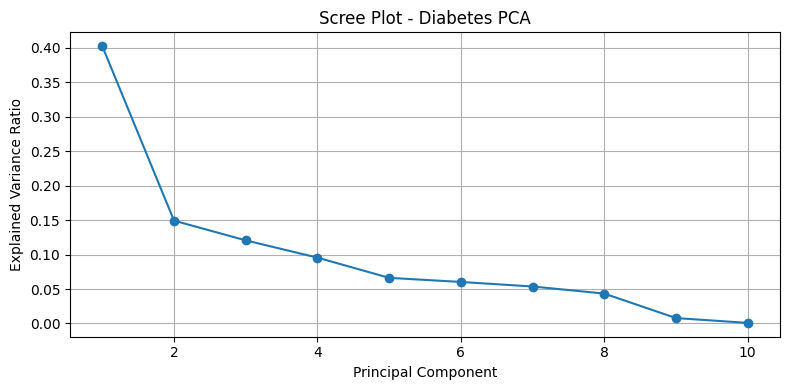

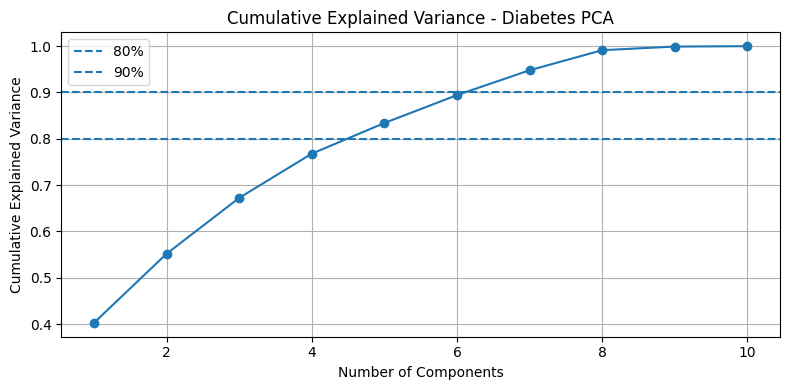

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# -------------------------------------------------
# 1) Load dataset and keep only features X
# -------------------------------------------------
data = load_diabetes()
X = data.data                # shape: (n_samples, n_features)
feature_names = data.feature_names

# Optional: put X into a DataFrame for readability
df = pd.DataFrame(X, columns=feature_names)

# -------------------------------------------------
# 2) Standardize features (mean=0, std=1)
# -------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)   # numpy array

# -------------------------------------------------
# 3) Fit PCA with all components
# -------------------------------------------------
pca = PCA()                 # n_components=None -> all components
pca.fit(X_scaled)

# These are the key attributes:
explained_var = pca.explained_variance_          # eigenvalues
explained_ratio = pca.explained_variance_ratio_  # ratio of variance
cumulative_ratio = np.cumsum(explained_ratio)    # cumulative ratio

# -------------------------------------------------
# 4) Build a clean summary table
# -------------------------------------------------
pca_table = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_var))],
    "explained_variance": explained_var,
    "explained_variance_ratio": explained_ratio,
    "cumulative_explained_variance": cumulative_ratio
})

print("=== PCA Summary Table ===")
print(pca_table)

# -------------------------------------------------
# 5) Find how many components for 80% and 90% variance
# -------------------------------------------------
threshold_80 = 0.80
threshold_90 = 0.90

# np.argmax returns the first index where condition is True
n_comp_80 = np.argmax(cumulative_ratio >= threshold_80) + 1  # +1 because index -> count
n_comp_90 = np.argmax(cumulative_ratio >= threshold_90) + 1

print(f"\nNumber of components to cover at least 80% variance: {n_comp_80}")
print(f"Number of components to cover at least 90% variance: {n_comp_90}")

# -------------------------------------------------
# 6) Scree plot (Explained variance ratio per PC)
# -------------------------------------------------
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_ratio) + 1), explained_ratio, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot - Diabetes PCA")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 7) Cumulative explained variance plot
# -------------------------------------------------
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_ratio) + 1), cumulative_ratio, marker='o')
plt.axhline(threshold_80, linestyle='--', label='80%')
plt.axhline(threshold_90, linestyle='--', label='90%')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance - Diabetes PCA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
data = load_diabetes()
X = data.data
feature_names = data.feature_names

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA with 3 components
pca = PCA(n_components=3)
pca.fit(X_scaled)

# Loadings: eigenvectors scaled by sqrt(eigenvalues)? Not needed.
# In sklearn, pca.components_ already gives the loading directions.
loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2", "PC3"],
    index=feature_names
)

print("=== PCA Loadings (PC1, PC2, PC3) ===")
print(loadings)


=== PCA Loadings (PC1, PC2, PC3) ===
          PC1       PC2       PC3
age  0.216431  0.044367  0.494668
sex  0.186967 -0.386547 -0.106864
bmi  0.303162 -0.156281  0.167527
bp   0.271738 -0.138266  0.513571
s1   0.343255  0.573027 -0.068579
s2   0.351861  0.455942 -0.269689
s3  -0.282437  0.506239  0.386032
s4   0.428834 -0.068181 -0.380680
s5   0.378618 -0.026187  0.063630
s6   0.322183 -0.084949  0.276842


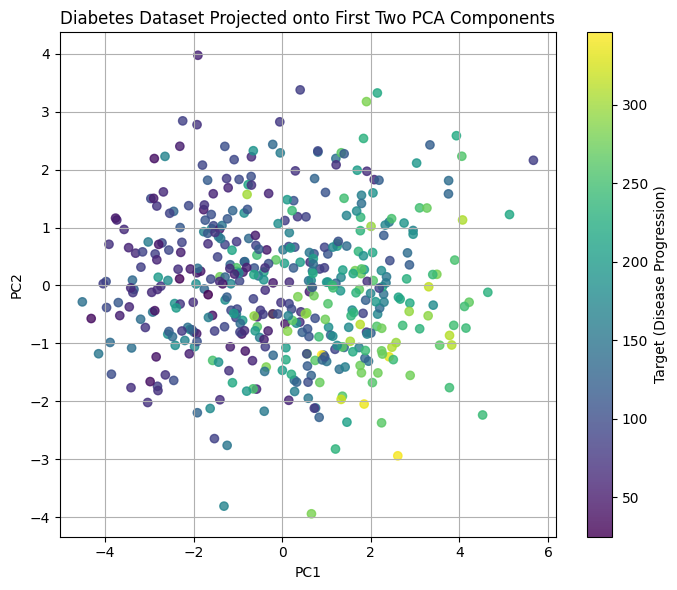

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -------------------------------
# Load dataset
# -------------------------------
data = load_diabetes()
X = data.data
y = data.target    

# -------------------------------
# Standardize features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# PCA with 2 components
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)   

# -------------------------------
# 2D Scatter plot colored by target
# -------------------------------
plt.figure(figsize=(7, 6))
scatter = plt.scatter(
    X_pca[:, 0], 
    X_pca[:, 1],
    c=y,
    cmap="viridis",
    alpha=0.8
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Diabetes Dataset Projected onto First Two PCA Components")
cbar = plt.colorbar(scatter)
cbar.set_label("Target (Disease Progression)")
plt.grid(True)
plt.tight_layout()
plt.show()


# LFW

In [11]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import pandas as pd

# ---------------------------------------------------------
# 1) Load LFW dataset  people with at least 50 images
# ---------------------------------------------------------
lfw = fetch_lfw_people(min_faces_per_person=50, resize=0.5)

In [12]:
images = lfw.images            # shape: (n_samples, h, w)
X = lfw.data                   # shape: (n_samples, h*w)
targets = lfw.target
names = lfw.target_names

h, w = lfw.images.shape[1], lfw.images.shape[2]

print("Image height:", h)
print("Image width :", w)
print("Number of images:", images.shape[0])
print("Pixels per image:", h*w)
print("Data matrix shape (samples × features):", X.shape)

# Example: show number of images for each person
counts = pd.Series(targets).value_counts()
person_counts = pd.DataFrame({
    "person": names[counts.index],
    "num_images": counts.values
})
print("\nImages per selected person:")
print(person_counts)

Image height: 62
Image width : 47
Number of images: 1560
Pixels per image: 2914
Data matrix shape (samples × features): (1560, 2914)

Images per selected person:
               person  num_images
0       George W Bush         530
1        Colin Powell         236
2          Tony Blair         144
3     Donald Rumsfeld         121
4   Gerhard Schroeder         109
5        Ariel Sharon          77
6         Hugo Chavez          71
7   Junichiro Koizumi          60
8       Jean Chretien          55
9       John Ashcroft          53
10    Serena Williams          52
11     Jacques Chirac          52


In [13]:
# Example: show number of images for each person
counts = pd.Series(targets).value_counts()
print(counts)
person_counts = pd.DataFrame({
    "person": names[counts.index],
    "num_images": counts.values
})
print("\nImages per selected person:")
person_counts

3     530
1     236
11    144
2     121
4     109
0      77
5      71
9      60
7      55
8      53
10     52
6      52
Name: count, dtype: int64

Images per selected person:


,person,num_images
0,George W Bush,530
1,Colin Powell,236
2,Tony Blair,144
3,Donald Rumsfeld,121
4,Gerhard Schroeder,109
5,Ariel Sharon,77
6,Hugo Chavez,71
7,Junichiro Koizumi,60
8,Jean Chretien,55
9,John Ashcroft,53


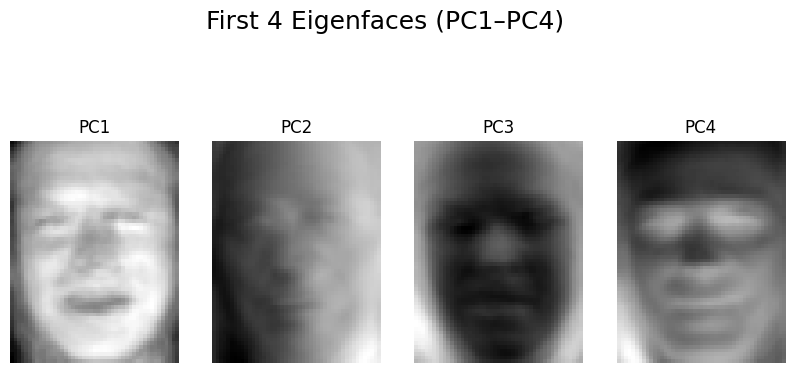

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# ---------------------------------------------------------
# Assuming X, h, w are loaded from part (a)
# X: shape (n_samples, n_pixels)
# ---------------------------------------------------------

n_components = 4   # PC1 to PC4

# Fit PCA
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True)
pca.fit(X)

eigenfaces = pca.components_.reshape((n_components, h, w))

# ---------------------------------------------------------
# Plot the first 4 principal components (Eigenfaces)
# ---------------------------------------------------------
plt.figure(figsize=(10, 5))
for i in range(n_components):
    plt.subplot(1, 4, i+1)
    plt.imshow(eigenfaces[i], cmap="gray")
    plt.title(f"PC{i+1}")
    plt.axis("off")

plt.suptitle("First 4 Eigenfaces (PC1–PC4)", fontsize=18)
plt.show()


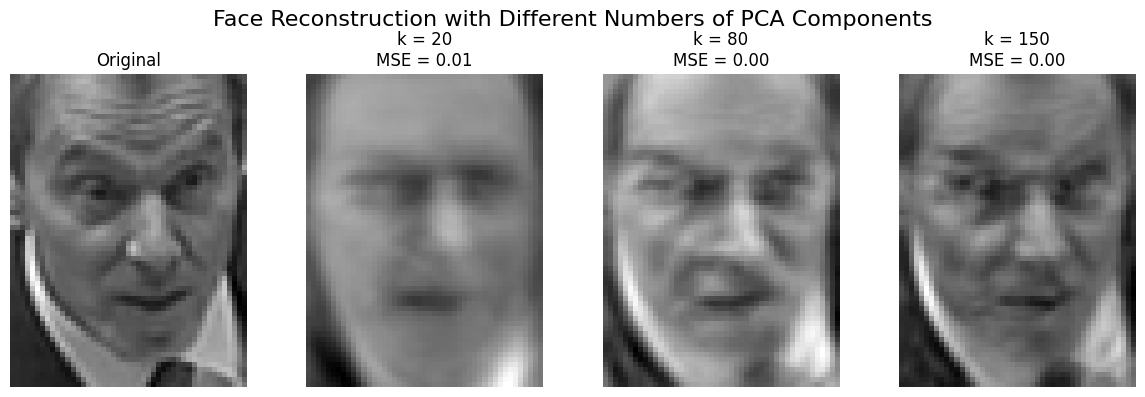

MSE for different k values:
k = 20: MSE = 0.0102
k = 80: MSE = 0.0042
k = 150: MSE = 0.0022


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ---------------------------------------------------------
# Assume X, images, h, w are already defined from part (a)
# X.shape = (n_samples, n_pixels)
# images.shape = (n_samples, h, w)
# ---------------------------------------------------------

# Choose one sample image index (e.g., 0)
idx = 0
original_image = images[idx]          # shape: (h, w)
original_vector = X[idx]              # shape: (h*w,)

# Different numbers of principal components
k_list = [20, 80, 150]

reconstructions = {}
mses = {}

for k in k_list:
    # Fit PCA with k components
    pca_k = PCA(n_components=k, svd_solver="randomized", whiten=False)
    pca_k.fit(X)

    # Project the selected image into k-dimensional PC space
    z = pca_k.transform(original_vector.reshape(1, -1))  # shape: (1, k)

    # Reconstruct back to original space
    x_hat = pca_k.inverse_transform(z)                   # shape: (1, n_pixels)
    x_hat_image = x_hat.reshape(h, w)

    reconstructions[k] = x_hat_image

    # Compute MSE between original image and reconstructed image
    mse = np.mean((original_image - x_hat_image) ** 2)
    mses[k] = mse

# ---------------------------------------------------------
# Plot original and reconstructed images side by side
# ---------------------------------------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original")
plt.axis("off")

for i, k in enumerate(k_list):
    plt.subplot(1, 4, i+2)
    plt.imshow(reconstructions[k], cmap="gray")
    plt.title(f"k = {k}\nMSE = {mses[k]:.2f}")
    plt.axis("off")

plt.suptitle("Face Reconstruction with Different Numbers of PCA Components", fontsize=16)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# Print MSE values clearly
# ---------------------------------------------------------
print("MSE for different k values:")
for k in k_list:
    print(f"k = {k}: MSE = {mses[k]:.4f}")


MSE (Original vs Noisy)        : 0.1189
MSE (Original vs Reconstructed): 0.0092


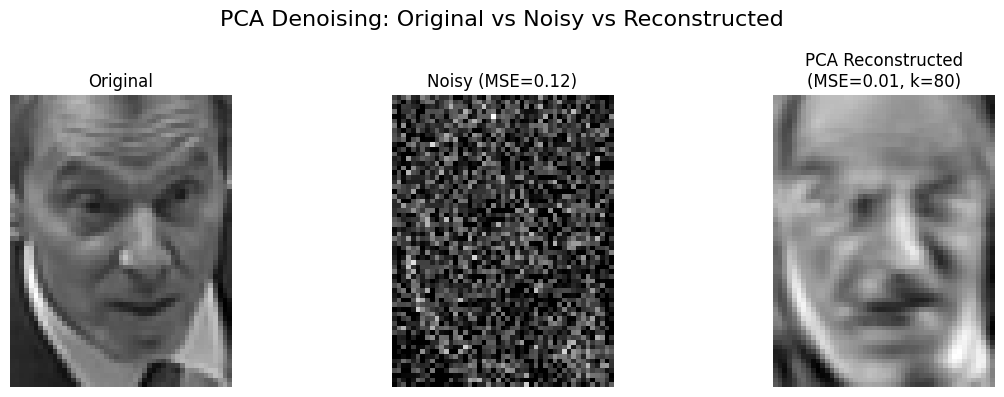

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ---------------------------------------------------------
# Assume X, images, h, w are already defined
# X.shape = (n_samples, n_pixels)
# images.shape = (n_samples, h, w)
# ---------------------------------------------------------

np.random.seed(42)  # for reproducibility

# 1) Choose one image
idx = 0
original_image = images[idx]          # shape: (h, w)
original_vector = X[idx]              # shape: (h*w,)

# 2) Add Gaussian noise to the image
sigma = 0.4  # noise standard deviation (tune this if needed)
noise = np.random.normal(loc=0.0, scale=sigma, size=original_image.shape)
noisy_image = original_image + noise

# Clip to valid range [0, 255] or [0, 1] depending on your scaling
# In LFW from sklearn, pixel values are usually already float in [0, 255] or [0, 1]
# To be safe, we clip to [0, 255]
noisy_image_clipped = np.clip(noisy_image, 0, 255)

noisy_vector = noisy_image_clipped.reshape(1, -1)  # shape: (1, n_pixels)

# 3) Fit PCA on the CLEAN data (X)
n_components = 80  # number of principal components for denoising
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=False)
pca.fit(X)

# 4) Project the NOISY image onto PCA subspace and reconstruct
z_noisy = pca.transform(noisy_vector)        # shape: (1, n_components)
x_hat_noisy = pca.inverse_transform(z_noisy) # shape: (1, n_pixels)
reconstructed_image = x_hat_noisy.reshape(h, w)

# 5) Compute MSE: Original vs Noisy, Original vs Reconstructed
mse_noisy = np.mean((original_image - noisy_image_clipped) ** 2)
mse_recon = np.mean((original_image - reconstructed_image) ** 2)

print(f"MSE (Original vs Noisy)        : {mse_noisy:.4f}")
print(f"MSE (Original vs Reconstructed): {mse_recon:.4f}")

# 6) Plot: Original, Noisy, Reconstructed
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(noisy_image_clipped, cmap="gray")
plt.title(f"Noisy (MSE={mse_noisy:.2f})")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap="gray")
plt.title(f"PCA Reconstructed\n(MSE={mse_recon:.2f}, k={n_components})")
plt.axis("off")

plt.suptitle("PCA Denoising: Original vs Noisy vs Reconstructed", fontsize=16)
plt.tight_layout()
plt.show()


In [34]:
targets

array([11,  4,  2, ...,  3, 11,  5], shape=(1560,))

In [36]:
names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [37]:
lfw

{'data': array([[0.3150327 , 0.33202615, 0.39869282, ..., 0.5254902 , 0.606536  ,
         0.46535948],
        [0.11895425, 0.22352941, 0.31633988, ..., 0.303268  , 0.40784314,
         0.52026147],
        [0.3647059 , 0.25490198, 0.19738562, ..., 0.5189543 , 0.18039216,
         0.3124183 ],
        ...,
        [0.19346406, 0.21176471, 0.2901961 , ..., 0.6862745 , 0.654902  ,
         0.5908497 ],
        [0.50980395, 0.6013072 , 0.654902  , ..., 0.9019608 , 0.8823529 ,
         0.8901961 ],
        [0.12287582, 0.09803922, 0.10980392, ..., 0.12941177, 0.1633987 ,
         0.29150328]], shape=(1560, 2914), dtype=float32),
 'images': array([[[0.3150327 , 0.33202615, 0.39869282, ..., 0.22352941,
          0.2771242 , 0.30588236],
         [0.3372549 , 0.34901962, 0.40392157, ..., 0.15555556,
          0.22745098, 0.3124183 ],
         [0.35947713, 0.38039216, 0.37124184, ..., 0.17254902,
          0.18431373, 0.2509804 ],
         ...,
         [0.18692811, 0.18431373, 0.1751634 , ..